# Quad tree from image

The main goal is to create a quad tree from an image and try to display it.

## Load an image

First thing we're going to do is to load an image and display it using matplotlib. It's a CC image from Flickr user yokok, source https://www.flickr.com/photos/yokok/7034360407

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('split-Croatia.jpg')
img.shape

(1365, 2048, 3)

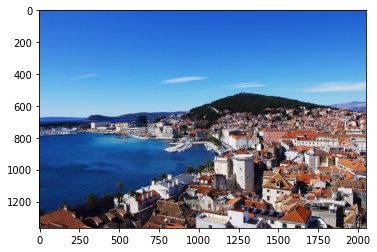

In [2]:
plt.imshow(img)

## Split image in 4

A big part of how the algorithm works is splitting the image into 4 quarters and calculate the mean color of each part to create a level of the tree. Let's split Split in 4 and calculate the mean color of each quarter.

In [3]:
from operator import add
from functools import reduce

def split4(image):
    half_split = np.array_split(image, 2)
    res = map(lambda x: np.array_split(x, 2, axis=1), half_split)
    return reduce(add, res)

split_img = split4(img)
split_img[0].shape

(683, 1024, 3)

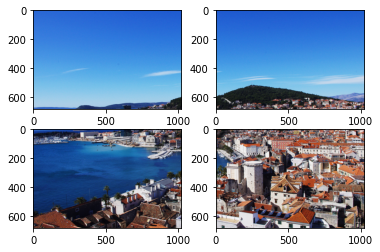

In [4]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(split_img[0])
axs[0, 1].imshow(split_img[1])
axs[1, 0].imshow(split_img[2])
axs[1, 1].imshow(split_img[3])

## Reconstruct the full image from the split
This will be useful when we want to display the image back, as the quadtree will store the images split into 4

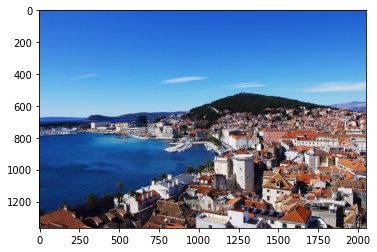

In [5]:
def concatenate4(north_west, north_east, south_west, south_east):
    top = np.concatenate((north_west, north_east), axis=1)
    bottom = np.concatenate((south_west, south_east), axis=1)
    return np.concatenate((top, bottom), axis=0)

full_img = concatenate4(split_img[0], split_img[1], split_img[2], split_img[3])
plt.imshow(full_img)
plt.show()

## Calculate the mean

Now we want to calculate the mean of all the parts of the split.

[[[ 78 146 219]
  [ 69 128 195]]

 [[ 58  76 109]
  [135 113 108]]]


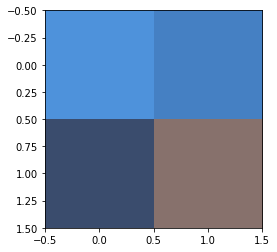

In [6]:
def calculate_mean(img):
    return np.mean(img, axis=(0, 1))

means = np.array(list(map(lambda x: calculate_mean(x), split_img))).astype(int).reshape(2,2,3)
print(means)
plt.imshow(means)
plt.show()

## QuadTree data structure

Now let's create a data structure that will allow us to construct our quad tree. It's a recursive calculation.

In [7]:
def checkEqual(myList):
    first=myList[0]
    return all((x==first).all() for x in myList)

class QuadTree:
    
    def insert(self, img, level = 0):
        self.level = level
        self.mean = calculate_mean(img).astype(int)
        self.resolution = (img.shape[0], img.shape[1])
        self.final = True
        
        if not checkEqual(img):
            split_img = split4(img)
            
            self.final = False
            self.north_west = QuadTree().insert(split_img[0], level + 1)
            self.north_east = QuadTree().insert(split_img[1], level + 1)
            self.south_west = QuadTree().insert(split_img[2], level + 1)
            self.south_east = QuadTree().insert(split_img[3], level + 1)

        return self
    
    def get_image(self, level):
        if(self.final or self.level == level):
            return np.tile(self.mean, (self.resolution[0], self.resolution[1], 1))
        
        return concatenate4(
            self.north_west.get_image(level), 
            self.north_east.get_image(level),
            self.south_west.get_image(level),
            self.south_east.get_image(level))

In [8]:
quadtree = QuadTree().insert(img)

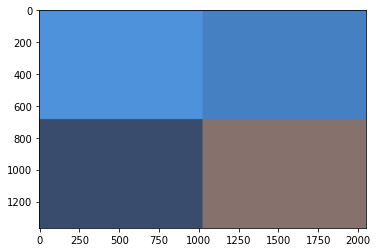

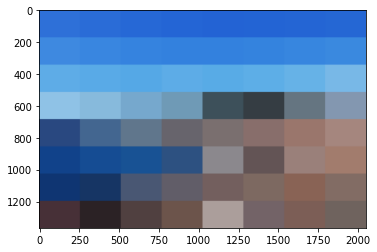

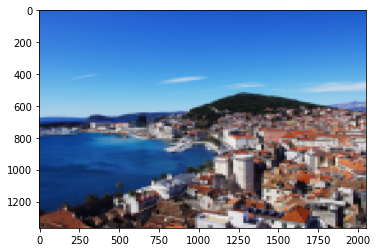

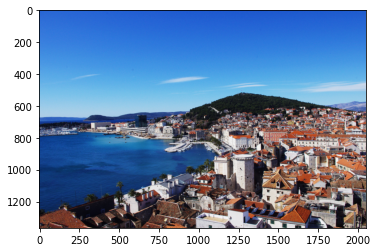

In [9]:
plt.imshow(quadtree.get_image(1))
plt.show()
plt.imshow(quadtree.get_image(3))
plt.show()
plt.imshow(quadtree.get_image(7))
plt.show()
plt.imshow(quadtree.get_image(10))
plt.show()